In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the preprocessed data
data = pd.read_json(r'C:\Users\paolo\OneDrive\Documents\GitHub\CMSC-197-Miniproject\data\amazon_data.json')

In [3]:
# Split the data into features and labels
X = data['Review_Text']
y = data['Label']

In [4]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [5]:
# Split the data into training (10%) and evaluation (90%) sets
X_train, X_eval, y_train, y_eval = train_test_split(X_tfidf, y, test_size=0.9, random_state=42)

In [6]:
# View sizes of the training and evaluation sets
print("x_train size:", X_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", X_eval.shape)
print("y_test size:", y_eval.shape)

x_train size: (2100, 35867)
y_train size: (2100,)

x_test size: (18900, 35867)
y_test size: (18900,)


In [9]:
# Convert labels to binary
y_train = y_train.astype(int)
y_eval = y_eval.astype(int)

# Implement logistic regression from scratch
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0
        self.X = X
        self.y = y

        for _ in range(self.num_iterations):
            self.update_weights()

    def update_weights(self):
        linear_model = self.X.dot(self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)

        dw = (1 / self.m) * np.dot(self.X.T, (y_predicted - self.y))
        db = (1 / self.m) * np.sum(y_predicted - self.y)

        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = X.dot(self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

In [11]:
# train
model = LogisticRegression(learning_rate=0.8, num_iterations=10000)
model.fit(X_train.toarray(), y_train)

In [12]:
# evalutate
y_pred = model.predict(X_eval.toarray())
accuracy = accuracy_score(y_eval, y_pred)
report = classification_report(y_eval, y_pred)

In [13]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.6219576719576719
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      9443
           1       0.62      0.64      0.63      9457

    accuracy                           0.62     18900
   macro avg       0.62      0.62      0.62     18900
weighted avg       0.62      0.62      0.62     18900



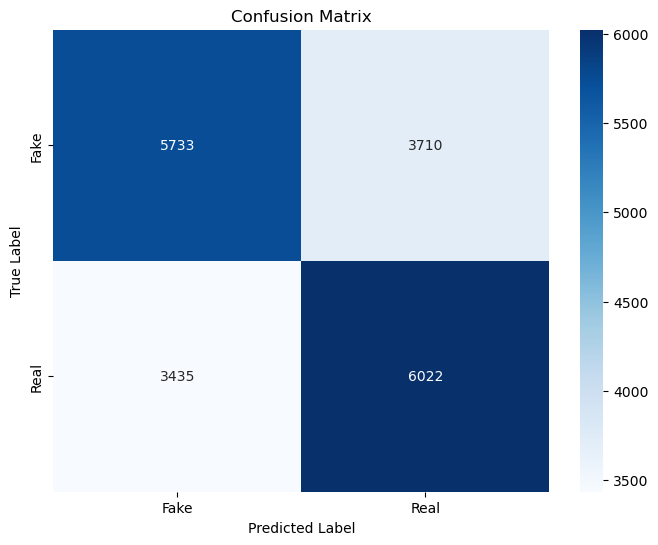

In [14]:
# cnfusion matrix
conf_matrix = confusion_matrix(y_eval, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()